# quadrotor planning with three obstacle avoidance - MPC

## Problem definition

In [44]:
load_termination_criteria = true
ϵ_admm_dual = 1e-5
include("ex11_data_mpc.jl");

## Load tools

In [45]:
@load_file "pipg_suite.jl" true
@load_file "pipg_var.jl" true
@load_file "mpc_utils.jl" true
@load_file "ex11_plotting.jl" false;

## Run MPC

In [46]:
timeit_var = mpc_utils.execute_mpc!(:warm_feas,false);

                                 ..:: MPC Simulation ::..
-------------------------------------------------------------------------------------------
  Solve Instant  |   Dyn. Err.   |  Rel. Dist. to Opt. |   Solve Time (ms)  |  JuMP Status  
-------------------------------------------------------------------------------------------
        1        |  4.353827e-03 |      5.186e-02      |      1.21e+02      |   OPTIMAL
        2        |  1.651539e-02 |      9.477e-02      |      9.68e+01      |   OPTIMAL
        3        |  2.156801e-02 |      8.363e-02      |      1.08e+02      |   OPTIMAL
        4        |  3.415098e-02 |      1.595e-01      |      7.32e+01      |   OPTIMAL
        5        |  1.410206e-03 |      3.831e-02      |      8.91e+01      |   OPTIMAL
        6        |  5.204573e-03 |      2.322e-02      |      6.39e+01      |   OPTIMAL
        7        |  6.670325e-03 |      1.553e-02      |      7.24e+01      |   OPTIMAL
        8        |  8.407434e-03 |      2.656e-02

## Visualization

In [47]:
# plotter.trajectory2D(mpc_utils.xmpc,mpc_utils.umpc[1:end-1],1,eX.yy_unscl[1:eX.N])

In [48]:
# plotter.trajectory3D(mpc_utils.xmpc,mpc_utils.umpc[1:end-1],eX.yy_unscl[1:eX.N])

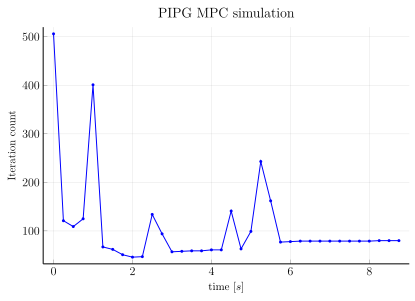

In [49]:
mpc_utils.plot_iter_count()

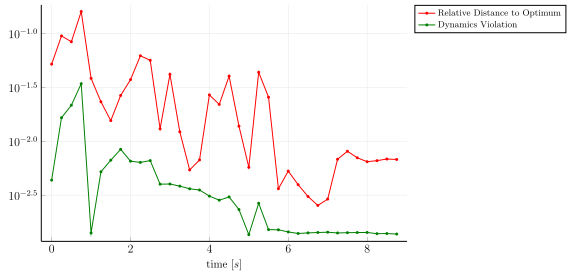

In [50]:
mpc_utils.plot_rd2o_dye()

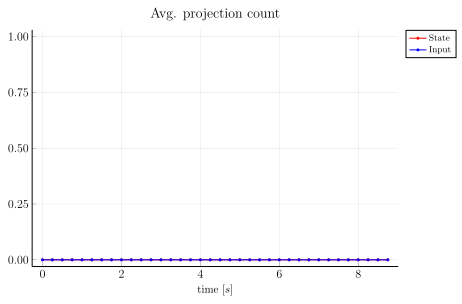

In [51]:
mpc_utils.plot_cum_proj()

## Benchmark MPC

In [52]:
show(timeit_var)

 ──────────────────────────────────────────────────────────────────────────
                                   Time                   Allocations      
                           ──────────────────────   ───────────────────────
     Tot / % measured:          6.87s / 34.2%            254MiB / 95.2%    

 Section           ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────────────
 JuMP                  36    2.30s  98.1%  63.9ms    241MiB  100%   6.71MiB
 PIPG                  36   45.4ms  1.94%  1.26ms     0.00B  0.00%    0.00B
 Warm-start PIPG       36   52.3μs  0.00%  1.45μs   4.50KiB  0.00%     128B
 Power iteration        1   52.2μs  0.00%  52.2μs     0.00B  0.00%    0.00B
 ──────────────────────────────────────────────────────────────────────────